### Metropolis-Hastings Algorithm
This is based on the pdf `monte_carlo.pdf`.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy import integrate

# first we define our S(x) function
def S(x):
    return (-x**2 + x**4)
# define the negative exponential of the function
def expd(x):
    return np.exp(-S(x))

# define pi(x), the probability distribution
area = integrate.quad(expd, -np.inf, np.inf)[0]
def pi(x):
    return expd(x)/area

def metropolis(num_samples, epsilon):
    outputs = []
    # pick our starting point
    x_t = 0
    
    for t in range(num_samples):
        if epsilon == 0:
            # generate a proposed next point, picked uniformly between -1.5 and 1.5
            x_prime = (3) * np.random.random_sample() - 1.5
        else:
            # generate a proposed next point, via x_prime = x_t + eta
            x_prime = x_t + np.random.uniform(-epsilon, epsilon)

        # check whether we accept or reject the point
        if (random.uniform(0,1) < pi(x_prime)/pi(x_t)):
            # if we accept, we modify the point, and use that as the starting point
            x_t = x_prime
        # add the chosen point to the list of points generated
        outputs.append(x_t)
    return outputs

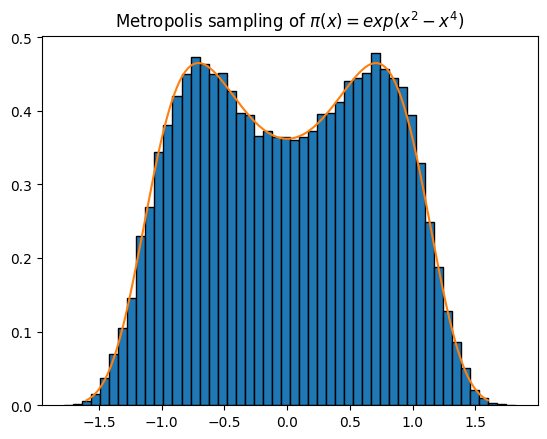

In [11]:
num_samples = 20**4
epsilon = 1
x = np.linspace(-1.6, 1.6, 1000)
y = pi(x)
met = metropolis(num_samples, epsilon)

yhist, xhist, _ = plt.hist(met, bins=50,density=True, edgecolor='black')
plt.plot(x,y)
plt.title("Metropolis sampling of $\pi(x) = exp(x^2 - x^4)$")
plt.show()